In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


# Simple Run

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 25.5 MB/s eta 0:00:00


In [ ]:
import easyocr      # EasyOCR library for multilingual OCR


In [ ]:
img_path = "/content/drive/MyDrive/Ai_Lab/Hand_Writing/Dataset/erfan_small/a12.jpg"

In [ ]:
reader = easyocr.Reader(['fa']) # this needs to run only once to load the model into memory
result = reader.readtext(img_path)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
result

[[[[np.int32(40), np.int32(33)],
   [np.int32(469), np.int32(33)],
   [np.int32(469), np.int32(107)],
   [np.int32(40), np.int32(107)]],
  'آن چه راکه دارید با خواستن',
  np.float64(0.3893945821896624)],
 [[[np.int32(128), np.int32(91)],
   [np.int32(471), np.int32(91)],
   [np.int32(471), np.int32(167)],
   [np.int32(128), np.int32(167)]],
  'آن چه كه ندارید خراب',
  np.float64(0.590972999549549)],
 [[[np.int32(39), np.int32(151)],
   [np.int32(469), np.int32(151)],
   [np.int32(469), np.int32(213)],
   [np.int32(39), np.int32(213)]],
  'نکنید , به خاطر داشته باشید',
  np.float64(0.6082410455161985)],
 [[[np.int32(92), np.int32(218)],
   [np.int32(378), np.int32(218)],
   [np.int32(378), np.int32(272)],
   [np.int32(92), np.int32(272)]],
  'اکنون دارید زمانی',
  np.float64(0.8397987347505603)],
 [[[np.int32(47), np.int32(275)],
   [np.int32(466), np.int32(275)],
   [np.int32(466), np.int32(328)],
   [np.int32(47), np.int32(328)]],
  'جزو مواردی بوده که امید وار',
  np.float64(0.556280

#Simpe run_Show box

In [ ]:
pip install supervision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
import easyocr
import supervision as sv
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img_path1 = "/content/drive/MyDrive/Ai_Lab/Hand_Writing/Dataset/erfan_small/a12.jpg"

In [ ]:
reader = easyocr.Reader(['fa']) # this needs to run only once to load the model into memory
result = reader.readtext(img_path1)

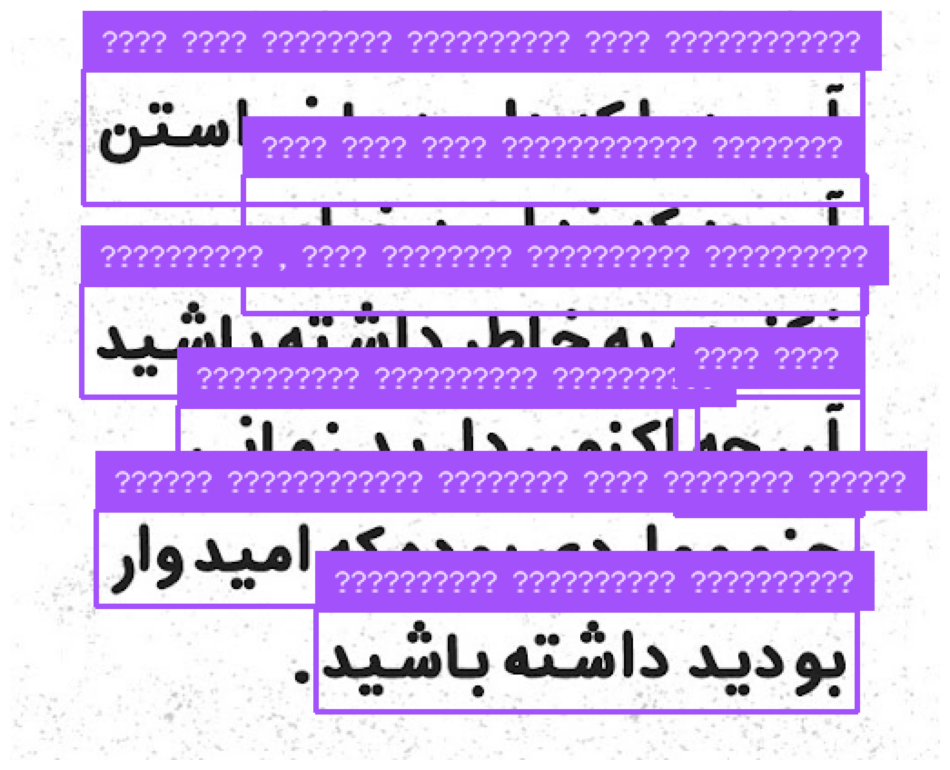

error: OpenCV(4.12.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:1051: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


In [ ]:

# Load image using OpenCV
image = cv2.imread(img_path1)

# Prepare lists for bounding boxes, confidences, class IDs, and labels
xyxy, confidences, class_ids, label = [], [], [], []

# Extract data from OCR result
for detection in result:
    bbox, text, confidence = detection[0], detection[1], detection[2]

    # Convert bounding box format
    x_min = int(min([point[0] for point in bbox]))
    y_min = int(min([point[1] for point in bbox]))
    x_max = int(max([point[0] for point in bbox]))
    y_max = int(max([point[1] for point in bbox]))

    # Append data to lists
    xyxy.append([x_min, y_min, x_max, y_max])
    label.append(text)
    confidences.append(confidence)
    class_ids.append(0)

# Convert to NumPy arrays
detections = sv.Detections(
    xyxy=np.array(xyxy),
    confidence=np.array(confidences),
    class_id=np.array(class_ids)
)

# Annotate image with bounding boxes and labels
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=label)

# Display and save the annotated image
sv.plot_image(image=annotated_image)
Output_1 = "/content/drive/MyDrive/Ai_Lab/Hand_Writing/Dataset/erfan_small/result1"
cv2.imwrite(Output_1, annotated_image)

# Run othe model with easyocr
## need .pth and .yaml file

In [2]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 23.9 MB/s eta 0:00:00


In [3]:
import easyocr
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # برای نمایش تصویر در Colab

In [10]:
model_path = '/content/drive/MyDrive/Ai_Lab/Hand_Writing/models_github/stuff/custom_example/custom_example.pth'
# فراخوانی Reader با مدل سفارشی
reader = easyocr.Reader(
    lang_list=['en'],
    #gpu=True,  # استفاده از GPU (در صورت وجود)
    model_storage_directory='/content/drive/MyDrive/Ai_Lab/Hand_Writing/models_github/stuff/custom_example',  # مسیر ذخیره مدل
    user_network_directory='/content/drive/MyDrive/Ai_Lab/Hand_Writing/models_github/stuff/custom_example',  # مسیر فایل‌های سفارشی
    recog_network='custom_example'  # نام فایل مدل recognition
)

In [ ]:

# بارگذاری تصویر
image_path = '/content/drive/MyDrive/Ai_Lab/Hand_Writing/Dataset/erfan_small/e1.png'  # مسیر تصویر با متن عربی یا فارسی
image = cv2.imread(image_path)

# اجرای OCR (تشخیص و بازشناسی)
results = reader.readtext(image_path, detail=1)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Text: FUN DAY IN, Confidence: 0.9506281821951336, Bounding Box: [[np.int32(99), np.int32(29)], [np.int32(175), np.int32(29)], [np.int32(175), np.int32(45)], [np.int32(99), np.int32(45)]]
Text: THE PARK, Confidence: 0.8712666817560941, Bounding Box: [[np.int32(99), np.int32(39)], [np.int32(163), np.int32(39)], [np.int32(163), np.int32(55)], [np.int32(99), np.int32(55)]]
Text: Ycstcrday,, Confidence: 0.7996954612742223, Bounding Box: [[np.int32(18), np.int32(63)], [np.int32(73), np.int32(63)], [np.int32(73), np.int32(77)], [np.int32(18), np.int32(77)]]
Text: family, Confidence: 0.6352192520404459, Bounding Box: [[np.int32(101), np.int32(65)], [np.int32(137), np.int32(65)], [np.int32(137), np.int32(79)], [np.int32(101), np.int32(79)]]
Text: had, Confidence: 0.9999492764472961, Bounding Box: [[np.int32(175), np.int32(65)], [np.int32(197), np.int32(65)], [np.int32(197), np.int32(77)], [np.int32(175), np.int32(77)]]
Text: litle, Confidence: 0.22854438777184485, Bounding Box: [[np.int32(20), 

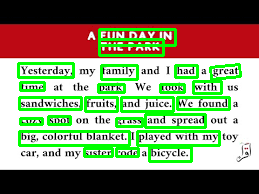

In [ ]:
# نمایش نتایج
for (bbox, text, confidence) in results:
    print(f"Text: {text}, Confidence: {confidence}, Bounding Box: {bbox}")

# رسم جعبه‌ها روی تصویر (اختیاری)
for (bbox, text, confidence) in results:
    bbox = np.array(bbox, dtype=np.int32)
    cv2.polylines(image, [bbox], True, (0, 255, 0), 2)  # جعبه سبز
cv2_imshow(image)